# CAM-Compression Spring-Follower
### INME 4012
#### Christian J. Lagares Nieves

Illustrated below is a circular disk cam assembly with a helical compression spring. The spring has plain ground ends. The cam is a circle with an eccentricity e = 0.75 in. The total follower displacement is 2e or 1.5 in. The length of the spring when the follower is fully extended is 6.75 in. A rod with a 1.5 in diameter passes through the center of the helical compression spring. The spring force in the BDC (Bottom Dead Center) load position is 150 lb and the spring force in the TDC (Top Dead Center) load position is 300 lb. The disk cam rotates at 1,200 RPM. The spring material is made of chrome-vanadium wire that has been shot peened.

List all assumptions and determine:

* Wire diameter d
* Mean Coil Diameter D
* Number of active turns N
* Fundamental Frequency f
* Spring rate k
* Free length of spring L<sub>f</sub>
* Solid length of spring L<sub>s</sub>
* Fatigue safety factor

![CAM-Spring Figure](http://localhost:8888/notebooks/Desktop/Screen%20Shot%202017-04-05%20at%209.43.23%20AM.png)

## Modules Import

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Main Parameters

In [2]:
Fmax = 300     # lbf
Fmin = 150     # lbf
e = 0.75       # in
omega = 1200   # RPM
minD = 1.5     # in
maxComp = 6.75 # in

## Procedure

In order to determine k, we can simply find the relation between the maximum displacement/force and minimum, or initial, displacement/force.

$$F = k \delta$$

$$k = \frac{F}{\delta}$$

In [3]:
dF = Fmax-Fmin # lbf
delta = 2*e    # in
k = dF/delta   # lbf/in
print("k =",k,"lbf/in")

k = 100.0 lbf/in


In [4]:
drange = np.zeros((1000,),dtype=np.float32)
sultrange = np.zeros((1000,),dtype=np.float32)

In [5]:
# Chrome Vanadium Wire
mind = 0.032
maxd = 0.437
A = 169000 
m = 0.168
G = 11.2 # Mpsi

drange = np.array(range(len(drange)))*((maxd-mind)/len(drange))+0.032
sultrange = A/(drange**m)
syrange = 0.45*sultrange

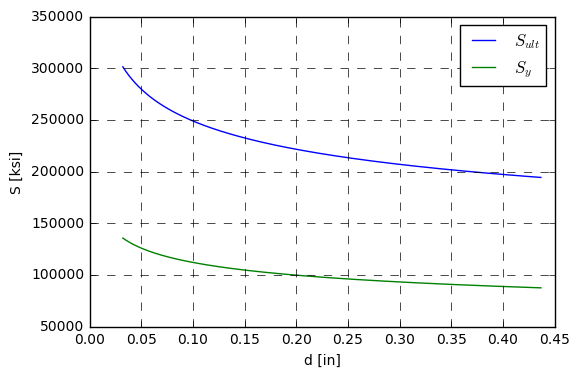

In [6]:
ultplot = plt.plot(drange,sultrange,label="$S_{ult}$")
yieplot = plt.plot(drange,syrange,label="$S_y$")
plt.legend()
plt.xlabel("d [in]")
plt.ylabel("S [ksi]")
plt.grid(True, which='major',linestyle='--',color='k')
plt.show()

## Determining C and D

Given the provided parameters, D will be computed parting from an allowance and the follower's diameter.

$$D = d_{rod}+d+allowance$$

$$C = \frac{D}{d}$$

In [7]:
allowance = 0.125
Drange = minD + drange + allowance

C = Drange/drange

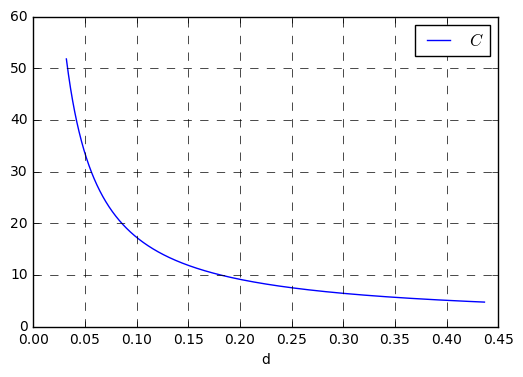

In [8]:
Cplot = plt.plot(drange,C,label="$C$")
plt.legend()
plt.xlabel("d")
plt.grid(True, which='major',linestyle='--',color='k')
plt.show()

In [9]:
KB = ((4*C)+2)/((4*C)-3)
notComply = []
for ii, Cs in enumerate(C):
    if Cs > 12:
        notComply.append(ii)
    elif Cs < 4:
        notComply.append(ii)

d = np.delete(drange,notComply)
D = np.delete(Drange,notComply)
KB = np.delete(KB, notComply)
sult = np.delete(sultrange,notComply)
sy = np.delete(syrange,notComply)
C = np.delete(C,notComply)

## Computing Stress 

$$\tau_{s} = \frac{8K_B(1+\epsilon)F_{max}D}{\pi d^3} $$


In [10]:
epsilon = 0.15

taus = (8*KB*(1+epsilon)*Fmax*D)/(np.pi*(d**3))

ns = sy/taus

Deleting all values along the arrays corresponding to a safety factor below 1.2.

In [11]:
notComply = []
for ii, Ns in enumerate(ns):
    if Ns < 1.2:
        notComply.append(ii)

d = np.delete(drange,notComply)
D = np.delete(Drange,notComply)
KB = np.delete(KB, notComply)
sult = np.delete(sultrange,notComply)
sy = np.delete(syrange,notComply)
C = np.delete(C,notComply)
taus = np.delete(taus, notComply)
ns = np.delete(ns,notComply)

## Determine number of Active Turns

From the previously determined value of $k$, one can determine the required number of active turns.

$$k = \frac{d^4 G}{8D^3N}$$

Solving for N,

$$N_a = \frac{d^4 G}{8D^3k}$$

In [12]:
Na = ((d**4)*G)/(8*(D**3)*k)

In [13]:
# Plain and Ground
Ne = 1
Nt = Na + Ne

Ls = d*Nt

a = 0.5
clearance = 0.25

Lo = 2.63*(D/a) - clearance
p = Lo/(Na+1)

In [14]:
delta = Lo-maxComp
Ferror = 100*(np.absolute((delta*k)-Fmax)/Fmax)

In [15]:
Dpossible = []
dpossible = []
KBpossible = []
sultpossible = []
sypossible = []
Cpossible = []
tauspossible = []
nspossible = []
Napossible = []
Ntpossible = []
Lopossible = []
Lspossible = []
ppossible = []
Ferrorpossible = []

for ii, error in enumerate(Ferror):
    if error < 1:
        Dpossible.append(D[ii])
        dpossible.append(d[ii])
        KBpossible.append(KB[ii])
        sultpossible.append(sult[ii])
        sypossible.append(sy[ii])
        Cpossible.append(C[ii])
        tauspossible.append(taus[ii])
        nspossible.append(ns[ii])
        Napossible.append(Na[ii])
        Ntpossible.append(Nt[ii])
        Lopossible.append(Lo[ii])
        Lspossible.append(Ls[ii])
        ppossible.append(p[ii])
        Ferrorpossible.append(Ferror[ii])

In [16]:
PossibleData = pd.DataFrame({
    'D': Dpossible,
    'd': dpossible,
    'Kb': KBpossible,
    'Sult': sultpossible,
    'Sy': sypossible,
    'C': Cpossible,
    'Tau': tauspossible,
    'ns': nspossible,
    'Na': Napossible,
    'Nt': Ntpossible,
    'Lo': Lopossible,
    'Ls': Lspossible,
    'p': ppossible,
    'F error': Ferrorpossible
})
PossibleData

,C,D,F error,Kb,Lo,Ls,Na,Nt,Sult,Sy,Tau,d,ns,p
0,5.205759,1.895545,0.98111,1.280536,9.720567,0.270548,0.000011,1.000011,210508.902283,94729.006027,39229.876540,0.270545,2.274389,9.720460
1,5.201355,1.895950,0.91010,1.280813,9.722697,0.270953,0.000011,1.000011,210456.007136,94705.203211,39123.123971,0.270950,2.280194,9.722589
2,5.196960,1.896355,0.83909,1.281091,9.724827,0.271358,0.000011,1.000011,210403.204256,94681.441915,39016.785828,0.271355,2.286006,9.724719
3,5.192575,1.896760,0.76808,1.281368,9.726958,0.271763,0.000011,1.000011,210350.493345,94657.722005,38910.860044,0.271760,2.291827,9.726849
4,5.188198,1.897165,0.69707,1.281646,9.729088,0.272168,0.000011,1.000011,210297.874105,94634.043347,38805.344566,0.272165,2.297655,9.728978
5,5.183831,1.897570,0.62606,1.281923,9.731218,0.272573,0.000011,1.000011,210245.346241,94610.405808,38700.237352,0.272570,2.303492,9.731108
6,5.179473,1.897975,0.55505,1.282201,9.733348,0.272978,0.000011,1.000011,210192.909459,94586.809257,38595.536373,0.272975,2.309336,9.733238
7,5.175124,1.898380,0.48404,1.282478,9.735479,0.273383,0.000011,1.000011,210140.563467,94563.253560,38491.239613,0.273380,2.315189,9.735368
8,5.170784,1.898785,0.41303,1.282755,9.737609,0.273788,0.000011,1.000011,210088.307973,94539.738588,38387.345066,0.273785,2.321049,9.737497
9,5.166453,1.899190,0.34202,1.283033,9.739739,0.274193,0.000012,1.000012,210036.142687,94516.264209,38283.850741,0.274190,2.326918,9.739627


In [17]:
Dmin = []
dmin = []
KBmin = []
sultmin = []
symin = []
Cmin = []
tausmin = []
nsmin = []
Namin = []
Ntmin = []
Lomin = []
Lsmin = []
pmin = []
Ferrormin = []

for ii, error in enumerate(Ferror):
    if error == min(Ferror):
        Dmin.append(D[ii])
        dmin.append(d[ii])
        KBmin.append(KB[ii])
        sultmin.append(sult[ii])
        symin.append(sy[ii])
        Cmin.append(C[ii])
        tausmin.append(taus[ii])
        nsmin.append(ns[ii])
        Namin.append(Na[ii])
        Ntmin.append(Nt[ii])
        Lomin.append(Lo[ii])
        Lsmin.append(Ls[ii])
        pmin.append(p[ii])
        Ferrormin.append(Ferror[ii])


In [18]:
OptimalData = pd.DataFrame({
    'D': Dmin,
    'd': dmin,
    'Kb': KBmin,
    'Sult': sultmin,
    'Sy': symin,
    'C': Cmin,
    'Tau': tausmin,
    'ns': nsmin,
    'Na': Namin,
    'Nt': Ntmin,
    'Lo': Lomin,
    'Ls': Lsmin,
    'p': pmin,
    'F Error': Ferrormin
})
print("Taking as optimum the Free Length minimizing the resulting error force, \n")
OptimalData

Taking as optimum the Free Length minimizing the resulting error force, 



,C,D,F Error,Kb,Lo,Ls,Na,Nt,Sult,Sy,Tau,d,ns,p
0,5.144932,1.901215,0.01303,1.284418,9.750391,0.276218,0.000012,1.000012,209776.659322,94399.496695,37772.313528,0.276215,2.356379,9.750275


## Dynamic Analysis

The fundamental frequency for the current scenario can be found as:

$$f = \frac{1}{4} \sqrt{\frac{kg}{W}}$$

where W can be found as,

$$W = \rho (\pi N_t D) \frac{\pi}{4}d^2$$


In [19]:
density = 0.284 #lb/in^3
Wopt = density * (np.pi*np.array(Ntmin)*np.array(Dmin)) *((np.pi/4)*np.array(dmin)**2)
Wpos = density * (np.pi*np.array(Ntpossible)*np.array(Dpossible)) *((np.pi/4)*np.array(dpossible)**2)
print("Weight of optimal solution:",Wopt[0], "lb")

Weight of optimal solution: 0.101645696269 lb


In [20]:
g = 386.0886 #in/s^2
fopt = 0.25 * np.sqrt((k*g)/Wopt)
print("Fundamental Frequency:",fopt[0],"Hz")
print("Operating Frequency:", omega//60, "Hz")

Fundamental Frequency: 154.077420952 Hz
Operating Frequency: 20 Hz


In [21]:
taua = np.array(KBmin)*((8*((Fmax-Fmin)/2)*np.array(Dmin))/(np.pi*(np.array(dmin)**3)))
taum = np.array(KBmin)*((8*((Fmax+Fmin)/2)*np.array(Dmin))/(np.pi*(np.array(dmin)**3)))


Ssa = 57500
Ssm = 77500
Ssu = 0.67*np.array(sultmin)
Sse = Ssa/(1-(Ssm/Ssu)**2)
r = taua/taum

Ssa = (((r**2) * (Ssu**2))/(2*Sse))*(-1+np.sqrt(1+(((2*Sse)/(r*Ssu))**2)))
Ssa
print("Ssa =",Ssa[0]/1000,"kpsi")

Ssa = 35.4135587612 kpsi


In [22]:
nf = Ssa/taua
print("nf =",nf[0])

nf = 1.60019236224


In [23]:
print("k =",k,"lbf/in")
print("d =",dmin[0],"in")
print("D =",Dmin[0],"in")
print("Lf =",Lomin[0],"in")
print("Ls =",Lsmin[0],"in")
print("Na =",Namin[0],"turns")
print("Nt =",Ntmin[0],"turns")
print("f =",fopt[0],"Hz")
print("nf =", nf[0])

k = 100.0 lbf/in
d = 0.276215 in
D = 1.901215 in
Lf = 9.7503909 in
Ls = 0.276218275447 in
Na = 1.18583257773e-05 turns
Nt = 1.00001185833 turns
f = 154.077420952 Hz
nf = 1.60019236224
